# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

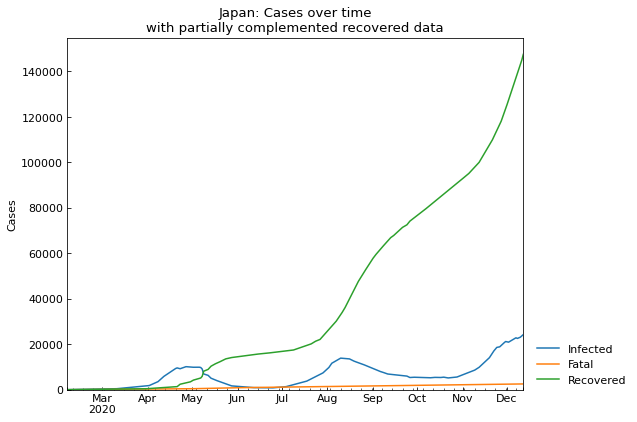

,Date,Confirmed,Infected,Fatal,Recovered
306,2020-12-08,163929,22553,2382,138994
307,2020-12-09,165840,22798,2420,140622
308,2020-12-10,168573,23102,2465,143006
309,2020-12-11,171542,24026,2502,145014
310,2020-12-12,174299,24241,2534,147524


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of new cases with `Scenario.record_diff()` method.

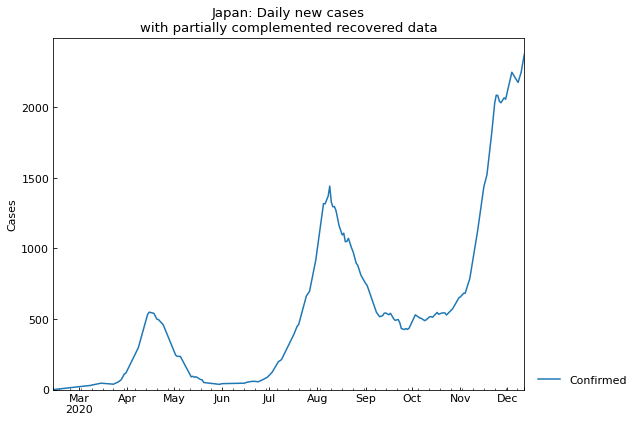

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

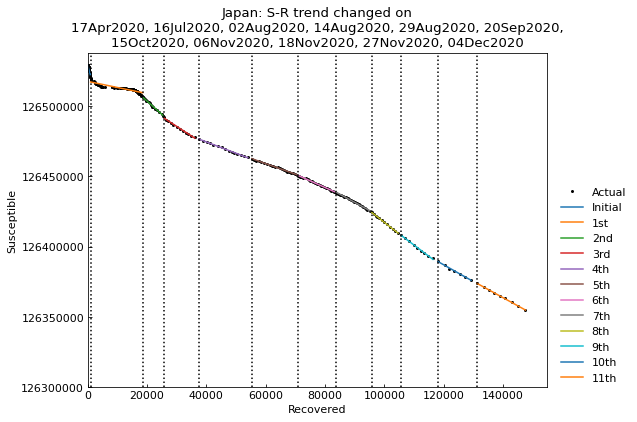

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,15Jul2020,126529100
2nd,Past,16Jul2020,01Aug2020,126529100
3rd,Past,02Aug2020,13Aug2020,126529100
4th,Past,14Aug2020,28Aug2020,126529100
5th,Past,29Aug2020,19Sep2020,126529100
6th,Past,20Sep2020,14Oct2020,126529100
7th,Past,15Oct2020,05Nov2020,126529100
8th,Past,06Nov2020,17Nov2020,126529100
9th,Past,18Nov2020,26Nov2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 5th phase (20Sep2020 - 14Oct2020): finished 3305 trials in 3 min  0 sec


	 4th phase (27Nov2020 - 03Dec2020): finished  856 trials in 0 min 30 sec

	 1st phase (06Nov2020 - 17Nov2020): finished  855 trials in 0 min 30 sec

	 2nd phase (29Aug2020 - 19Sep2020): finished  318 trials in 0 min 10 sec

	 6th phase (02Aug2020 - 13Aug2020): finished 3220 trials in 3 min  0 sec

	11th phase (18Nov2020 - 26Nov2020): finished 3227 trials in 3 min  0 sec

	 7th phase (17Apr2020 - 15Jul2020): finished 3094 trials in 3 min  0 sec

	10th phase (06Feb2020 - 16Apr2020): finished 3119 trials in 3 min  0 sec

	 8th phase (14Aug2020 - 28Aug2020): finished  308 trials in 0 min 10 sec

	 9th phase (04Dec2020 - 12Dec2020): finished  575 trials in 0 min 20 sec

	 3rd phase (16Jul2020 - 01Aug2020): finished 1223 trials in 0 min 50 sec

	 0th phase (15Oct2020 - 05Nov2020): finished 3569 trials in 3 min  0 sec

Completed optimization. Total: 9 min  3 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/beta [day],1/gamma [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.38,0.000794,0.000557,0.025880,0.005346,360,449,9,46,0.001,0.258484,3119,3 min 0 sec
1st,Past,17Apr2020,15Jul2020,126529100,SIR-F,0.51,0.069758,0.000318,0.007319,0.013128,360,785,34,19,0.070,0.355077,3094,3 min 0 sec
2nd,Past,16Jul2020,01Aug2020,126529100,SIR-F,1.90,0.000938,0.000031,0.036937,0.019350,360,7991,6,12,0.001,0.026212,1223,0 min 50 sec
3rd,Past,02Aug2020,13Aug2020,126529100,SIR-F,1.62,0.000864,0.000054,0.026142,0.016024,360,4669,9,15,0.001,0.040405,3220,3 min 0 sec
4th,Past,14Aug2020,28Aug2020,126529100,SIR-F,0.81,0.001098,0.000191,0.020198,0.024750,360,1309,12,10,0.001,0.017426,308,0 min 10 sec
5th,Past,29Aug2020,19Sep2020,126529100,SIR-F,0.73,0.003232,0.000309,0.019669,0.026466,360,808,12,9,0.003,0.037693,318,0 min 10 sec
6th,Past,20Sep2020,14Oct2020,126529100,SIR-F,0.93,0.000869,0.000257,0.022601,0.024113,360,972,11,10,0.001,0.024835,3305,3 min 0 sec
7th,Past,15Oct2020,05Nov2020,126529100,SIR-F,1.11,0.000440,0.000285,0.026300,0.023482,360,878,9,10,0.000,0.028691,3569,3 min 0 sec
8th,Past,06Nov2020,17Nov2020,126529100,SIR-F,1.62,0.000664,0.000255,0.034034,0.020678,360,982,7,12,0.001,0.010469,855,0 min 30 sec
9th,Past,18Nov2020,26Nov2020,126529100,SIR-F,1.67,0.000248,0.000189,0.033196,0.019693,360,1324,7,12,0.000,0.020503,3227,3 min 0 sec


### Accuracy of estimation

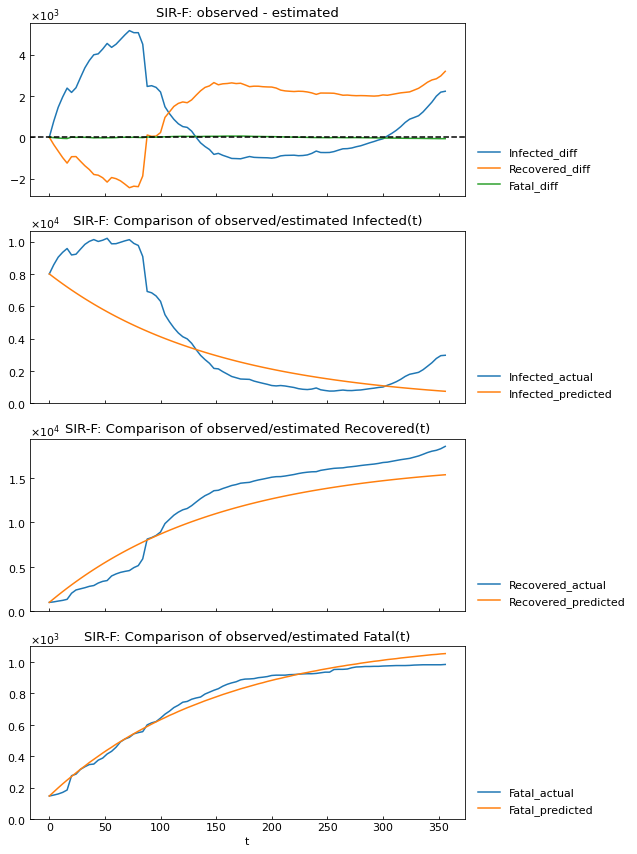

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [12]:
snl.get("Rt", phase="4th")

0.81

### Show parameter history

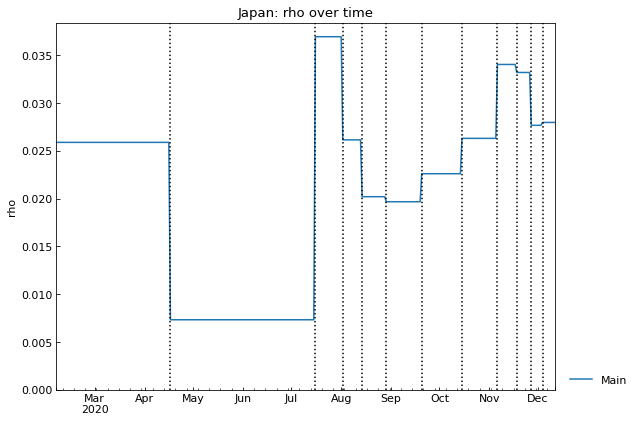

In [13]:
_ = snl.history(target="rho")

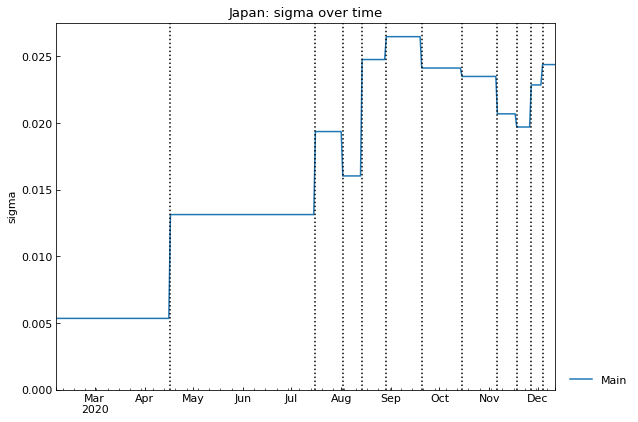

In [14]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

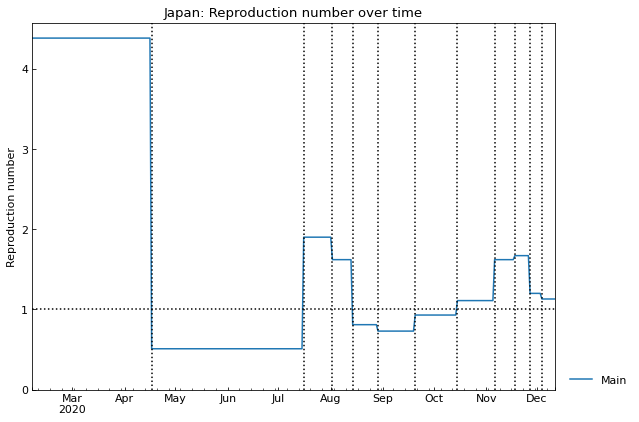

In [15]:
_ = snl.history(target="Rt")

### Simulate the number of cases

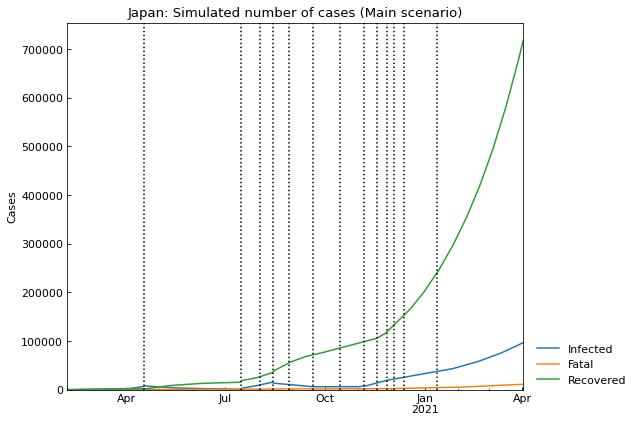

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,784580,10673,92251,681656
418,2021-03-30,794899,10812,93382,690705
419,2021-03-31,805344,10952,94527,699865
420,2021-04-01,815916,11094,95685,709137
421,2021-04-02,826616,11238,96856,718522


In [16]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [17]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.024371481505995825

In [18]:
sigma_new = sigma_current * 2
sigma_new

0.04874296301199165

In [19]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.38   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.51   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.90   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.62   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.81   
         5th      Past  29Aug2020  19Sep2020   126529100  SIR-F  0.73   
         6th      Past  20Sep2020  14Oct2020   126529100  SIR-F  0.93   
         7th      Past  15Oct2020  05Nov2020   126529100  SIR-F  1.11   
         8th      Past  06Nov2020  17Nov2020   126529100  SIR-F  1.62   
         9th      Past  18Nov2020  26Nov2020   126529100  SIR-F  1.67   
         10th     Past  27Nov2020  03Dec2020   126529100  SIR-F  1.20   
         11th     Past  04Dec2020  12Dec2020   126529100  SIR-F  1.13   
         12th   Future  13Dec2020  11Jan2021   126529100  SIR-F  1.13   
         13th   Future  12Jan2021  01Apr2021   126529100  SIR-F  1.13   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.38   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.51   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.90   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.62   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.81   
         5th      Past  29Aug2020  19Sep2020   126529100  SIR-F  0.73   
         6th      Past  20Sep2020  14Oct2020   126529100  SIR-F  0.93   
         7th      Past  15Oct2020  05Nov2020   126529100  SIR-F  1.11   
         8th      Past  06Nov2020  17Nov2020   126529100  SIR-F  1.62   
         9th      Past  18Nov2020  26Nov2020   126529100  SIR-F  1.67   
         10th     Past  27Nov2020  03Dec2020   126529100  SIR-F  1.20   
         11th     Past  04Dec2020  12Dec2020   126529100  SIR-F  1.13   
         12th   Future  13Dec2020  11Jan2021   126529100  SIR-F  1.13   
         13th   Future  12Jan2021  01Apr2021   126529100  SIR-F  0.57   

                   theta     kappa       rho     sigma  tau  1/alpha2 [day]  \
Scenario Phase                                                                
Main     0th    0.000794  0.000557  0.025880  0.005346  360             449   
         1st    0.069758  0.000318  0.007319  0.013128  360             785   
         2nd    0.000938  0.000031  0.036937  0.019350  360            7991   
         3rd    0.000864  0.000054  0.026142  0.016024  360            4669   
         4th    0.001098  0.000191  0.020198  0.024750  360            1309   
         5th    0.003232  0.000309  0.019669  0.026466  360             808   
         6th    0.000869  0.000257  0.022601  0.024113  360             972   
         7th    0.000440  0.000285  0.026300  0.023482  360             878   
         8th    0.000664  0.000255  0.034034  0.020678  360             982   
         9th    0.000248  0.000189  0.033196  0.019693  360            1324   
         10th   0.000139  0.000246  0.027667  0.022847  360            1017   
         11th   0.000426  0.000362  0.027967  0.024371  360             691   
         12th   0.000426  0.000362  0.027967  0.024371  360             691   
         13th   0.000426  0.000362  0.027967  0.024371  360             691   
Medicine 0th    0.000794  0.000557  0.025880  0.005346  360             449   
         1st    0.069758  0.000318  0.007319  0.013128  360             785   
         2nd    0.000938  0.000031  0.036937  0.019350  360            7991   
         3rd    0.000864  0.000054  0.026142  0.016024  360            4669   
         4th    0.001098  0.000191  0.020198  0.024750  360            1309   
         5th    0.003232  0.000309  0.019669  0.026466  360             808   
         6th    0.000869  0.000257  0.022601  0.024113  360             972   
         7

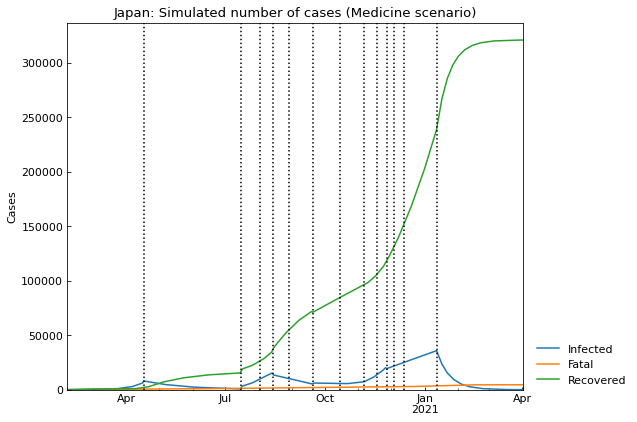

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,325253,4514,57,320682
418,2021-03-30,325258,4514,52,320692
419,2021-03-31,325264,4514,48,320702
420,2021-04-01,325269,4514,44,320711
421,2021-04-02,325274,4514,41,320719


In [20]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [21]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,96856,02Apr2021,826616,96856,11238,1.13
Medicine,35802,12Jan2021,325274,41,4514,0.57


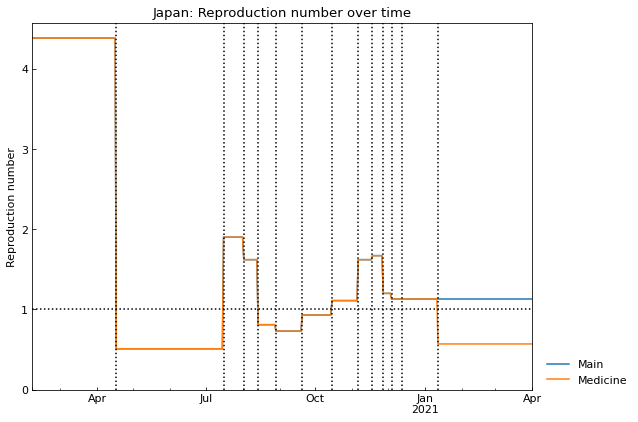

In [22]:
_ = snl.history(target="Rt")

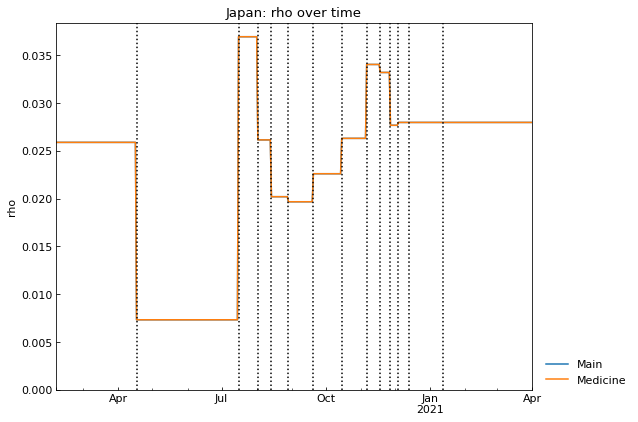

In [23]:
_ = snl.history(target="rho")

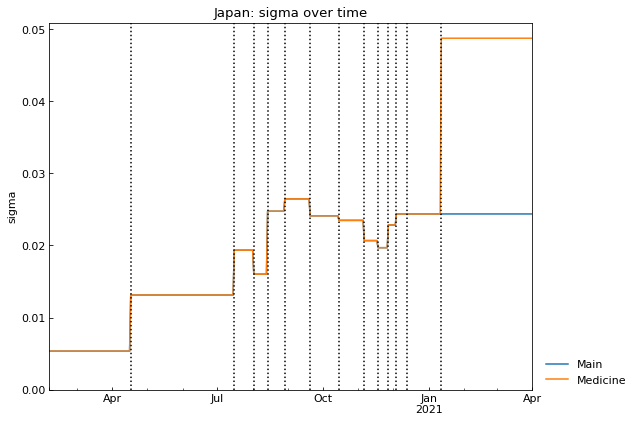

In [24]:
_ = snl.history(target="sigma")

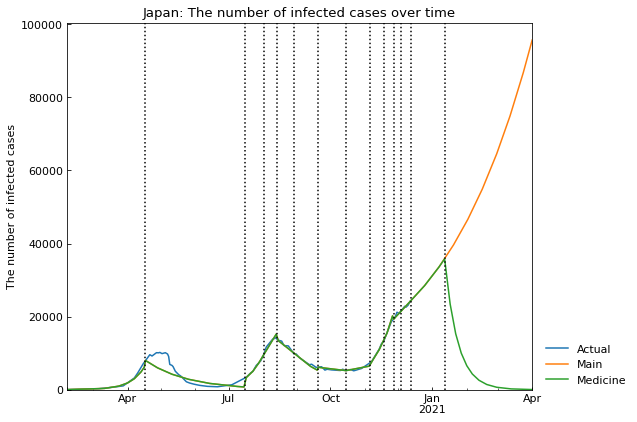

In [25]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

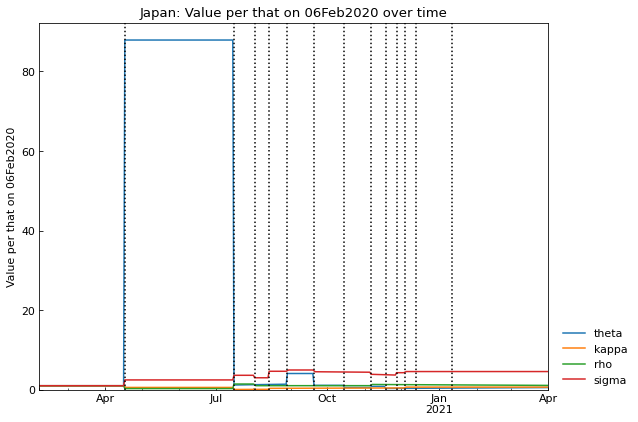

In [26]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [27]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 5th phase (20Sep2020 - 14Oct2020): finished 2751 trials in 3 min  0 sec


	12th phase (29Aug2020 - 31Aug2020): finished  235 trials in 0 min 10 sec

	 4th phase (27Nov2020 - 03Dec2020): finished  627 trials in 0 min 30 sec

	 1st phase (06Nov2020 - 17Nov2020): finished  801 trials in 0 min 40 sec

	 2nd phase (01Sep2020 - 19Sep2020): finished  224 trials in 0 min 10 sec

	11th phase (18Nov2020 - 26Nov2020): finished 2647 trials in 3 min  0 sec

	 6th phase (02Aug2020 - 13Aug2020): finished 2639 trials in 3 min  0 sec

	 7th phase (17Apr2020 - 15Jul2020): finished 2545 trials in 3 min  1 sec

	10th phase (06Feb2020 - 16Apr2020): finished 2577 trials in 3 min  0 sec

	 9th phase (04Dec2020 - 12Dec2020): finished  619 trials in 0 min 30 sec

	 8th phase (14Aug2020 - 28Aug2020): finished  218 trials in 0 min 10 sec

	 3rd phase (16Jul2020 - 01Aug2020): finished 1164 trials in 1 min  0 sec

	 0th phase (15Oct2020 - 05Nov2020): finished 3013 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 3rd phase (01Sep2020 - 12Dec2020): finished 8238 trials in 3 min  0 sec

Completed optimization. Total: 3 min  1 sec


In [28]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.38  0.000794  0.000557   
              1st    17Apr2020  15Jul2020  SIR-F  0.54  0.082532  0.000096   
              2nd    16Jul2020  01Aug2020  SIR-F  1.90  0.000938  0.000031   
              3rd    02Aug2020  13Aug2020  SIR-F  1.57  0.000195  0.000114   
              4th    14Aug2020  28Aug2020  SIR-F  0.81  0.001098  0.000191   
              5th    29Aug2020  31Aug2020  SIR-F  0.98  0.003086  0.000301   
              6th    01Sep2020  19Sep2020  SIR-F  0.73  0.003232  0.000309   
              7th    20Sep2020  14Oct2020  SIR-F  0.93  0.000869  0.000257   
              8th    15Oct2020  05Nov2020  SIR-F  1.11  0.000440  0.000285   
              9th    06Nov2020  17Nov2020  SIR-F  1.62  0.000664  0.000255   
              10th   18Nov2020  26Nov2020  SIR-F  1.67  0.000248  0.000189   
              11th   27Nov2020  03Dec2020  SIR-F  1.20  0.000139  0.000246   
              12th   04Dec2020  12Dec2020  SIR-F  1.13  0.000426  0.000362   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.38  0.000794  0.000557   
              1st    17Apr2020  15Jul2020  SIR-F  0.54  0.082532  0.000096   
              2nd    16Jul2020  01Aug2020  SIR-F  1.90  0.000938  0.000031   
              3rd    02Aug2020  13Aug2020  SIR-F  1.57  0.000195  0.000114   
              4th    14Aug2020  28Aug2020  SIR-F  0.81  0.001098  0.000191   
              5th    29Aug2020  31Aug2020  SIR-F  0.98  0.003086  0.000301   
              6th    01Sep2020  12Dec2020  SIR-F  0.98  0.003086  0.000301   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.025880  0.005346  0.258484    2577  3 min  0 sec  
              1st    0.008118  0.013689  0.355602    2545  3 min  1 sec  
              2nd    0.036937  0.019350  0.026212    1164  1 min  0 sec  
              3rd    0.026090  0.016540  0.041907    2639  3 min  0 sec  
              4th    0.020198  0.024750  0.017426     218  0 min 10 sec  
              5th    0.018882  0.018963  0.001991     235  0 min 10 sec  
              6th    0.019679  0.026488  0.028398     224  0 min 10 sec  
              7th    0.022601  0.024113  0.024835    2751  3 min  0 sec  
              8th    0.026300  0.023482  0.028691    3013  3 min  0 sec  
              9th    0.034034  0.020678  0.010469     801  0 min 40 sec  
              10th   0.033196  0.019693  0.020503    2647  3 min  0 sec  
              11th   0.027667  0.022847  0.012806     627  0 min 30 sec  
              12th   0.027967  0.024371  0.008853     619  0 min 30 sec  
Retrospective 0th    0.025880  0.005346  0.258484    2577  3 min  0 sec  
              1st    0.008118  0.013689  0.355602    2545  3 min  1 sec  
              2nd    0.036937  0.019350  0.026212    1164  1 min  0 sec  
              3rd    0.026090  0.016540  0.041907    2639  3 min  0 sec  
              4th    0.020198  0.024750  0.017426     218  0 min 10 sec  
              5th    0.018882  0.018963  0.001991     235  0 min 10 sec  
              6th    0.018882  0.018963  0.332614    8238  3 min  0 sec

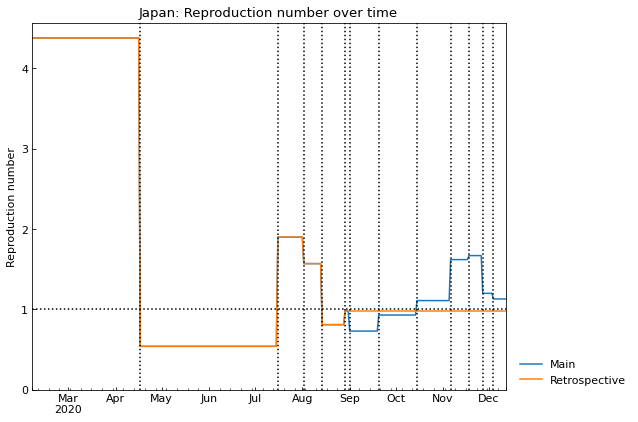

In [29]:
# History of reproduction number
_ = snl_retro.history("Rt")

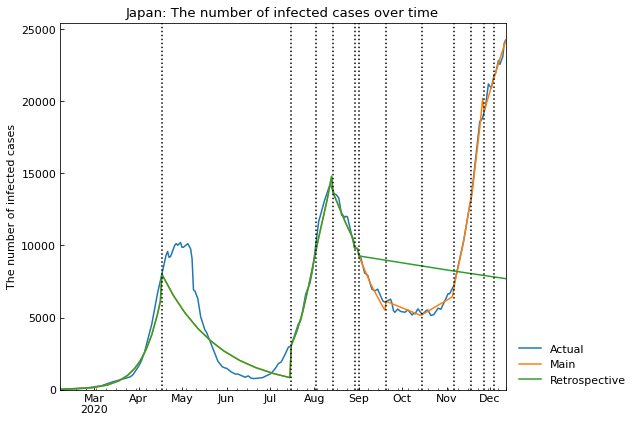

In [30]:
# History of Infected
_ = snl_retro.history("Infected")

In [31]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 13Dec2020,Infected on 13Dec2020,Fatal on 13Dec2020,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,24467,13Dec2020,178476,24467,2551,0.73,0.93,1.11,1.62,1.67,1.2,1.13
Retrospective,14792,13Aug2020,134130,7685,2549,0.98,-,-,-,-,-,-
